Project 5 - Cindy Davis, Yasmin Badri & Kennedy Bagnol

In [124]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [125]:
#add so I can see the data; credit https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/#:~:text=Setting%20to%20display%20All%20rows%20of%20Dataframe%20In,printing%20a%20dataframe.%20Default%20value%20of%20max_rowsis%2010.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-125-ab579f3ff478>:5: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [127]:
#read in data
df = pd.read_csv('./data_2/Project5_data.csv')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [128]:
#air quality data
aqi = pd.read_csv('./data_2/annual_aqi_by_states.csv')
aqi.head()

State  Good Days_count  Good Days_mean  Good Days_min  Good Days_max  \
0  Alabama     301              196.744186      6              350             
1  Alaska      131              212.809160      17             364             
2  Arizona     211              200.165877      14             364             
3  Arkansas    218              181.922018      10             357             
4  California  854              207.331382      1              360             

   Good Days_sum  Moderate Days_count  Moderate Days_mean  Moderate Days_min  \
0  59220          301                  72.598007           0                   
1  27878          131                  29.053435           0                   
2  42235          211                  108.289100          0                   
3  39659          218                  53.027523           0                   
4  177061         854                  110.415691          0                   

   Moderate Days_max  Moderate Days_sum  \
0  277                21852               
1  133                3806                
2  279                22849               
3  215                11560               
4  275                94295               

   Unhealthy for Sensitive Groups Days_count  \
0  301                                         
1  131                                         
2  211                                         
3  218                                         
4  854                                         

   Unhealthy for Sensitive Groups Days_mean  \
0  4.046512                                   
1  3.496183                                   
2  19.530806                                  
3  2.022936                                   
4  24.001171                                  

   Unhealthy for Sensitive Groups Days_min  \
0  0                                         
1  0                                         
2  0                                         
3  0                                         
4  0                                         

   Unhealthy for Sensitive Groups Days_max  \
0  59                                        
1  34                                        
2  134                                       
3  40                                        
4  122                                       

   Unhealthy for Sensitive Groups Days_sum  Unhealthy Days_count  \
0  1218                                     301                    
1  458                                      131                    
2  4121                                     211                    
3  441                                      218                    
4  20497                                    854                    

   Unhealthy Days_mean  Unhealthy Days_min  Unhealthy Days_max  \
0  0.398671             0                   16                   
1  2.175573             0                   46                   
2  3.483412             0                   92                   
3  0.188073             0                   7                    
4  7.621780             0                   74                   

   Unhealthy Days_sum  Very Unhealthy Days_count  Very Unhealthy Days_mean  \
0  120                 301                        0.009967                   
1  285                 131                        0.076336                   
2  735                 211                        0.862559                   
3  41                  218                        0.009174                   
4  6509                854                        0.804450                   

   Very Unhealthy Days_min  Very Unhealthy Days_max  Very Unhealthy Days_sum  \
0  0                        1                        3                         
1  0                        3                        10                        
2  0                        74                       182                       
3  0                        1                        2            

In [129]:
aqi.isnull().sum()

State                                        0
Good Days_count                              0
Good Days_mean                               0
Good Days_min                                0
Good Days_max                                0
Good Days_sum                                0
Moderate Days_count                          0
Moderate Days_mean                           0
Moderate Days_min                            0
Moderate Days_max                            0
Moderate Days_sum                            0
Unhealthy for Sensitive Groups Days_count    0
Unhealthy for Sensitive Groups Days_mean     0
Unhealthy for Sensitive Groups Days_min      0
Unhealthy for Sensitive Groups Days_max      0
Unhealthy for Sensitive Groups Days_sum      0
Unhealthy Days_count                         0
Unhealthy Days_mean                          0
Unhealthy Days_min                           0
Unhealthy Days_max                           0
Unhealthy Days_sum                           0
Very Unhealth

In [130]:
#merge air quality data with project 5 data
df = pd.merge(df, aqi, on = 'State', how = 'inner')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [131]:
#copper by state data
copper = pd.read_csv('./data_2/copper_by_states.csv')
copper.head()

State  Sample Measure (mg/L)_count  Sample Measure (mg/L)_mean  \
0  Alaska      305                          64.869975                    
1  Alabama     41                           21.375024                    
2  Arkansas    5                            9.738000                     
3  Arizona     70                           2.947371                     
4  California  1007                         3.629081                     

   Sample Measure (mg/L)_min  Sample Measure (mg/L)_max  \
0  1.350                      13220.0                     
1  1.382                      765.0                       
2  1.460                      41.0                        
3  1.350                      45.0                        
4  1.350                      520.0                       

   Sample Measure (mg/L)_sum  Population Served Count_count  \
0  19785.342300               305                             
1  876.376000                 41                              
2  48.690000                  5                               
3  206.316000                 70                              
4  3654.484958                1007                            

   Population Served Count_mean  Population Served Count_min  \
0  459.593443                    0                             
1  3012.487805                   50                            
2  2537.400000                   361                           
3  820.785714                    0                             
4  1838.503476                   0                             

   Population Served Count_max  Population Served Count_sum  \
0  6200                         140176                        
1  23637                        123512                        
2  6594                         12687                         
3  8013                         57455                         
4  35479                        1851373                       

  Sampling Start Date_mean Sampling Start Date_min Sampling Start Date_max  \
0  40:43.3                  00:00.0                 00:00.0                  
1  14:38.0                  00:00.0                 00:00.0                  
2  48:00.0                  00:00.0                 00:00.0                  
3  51:25.7                  00:00.0                 00:00.0                  
4  07:59.0                  00:00.0                 00:00.0                  

  Sampling End Date_mean Sampling End Date_min Sampling End Date_max  
0  02:57.0                00:00.0               00:00.0               
1  26:20.5                00:00.0               00:00.0               
2  00:00.0                00:00.0               00:00.0               
3  15:25.7                00:00.0               00:00.0               
4  16:30.3                00:00.0               00:00.0

In [132]:
copper.isnull().sum()

State                            0
Sample Measure (mg/L)_count      0
Sample Measure (mg/L)_mean       0
Sample Measure (mg/L)_min        0
Sample Measure (mg/L)_max        0
Sample Measure (mg/L)_sum        0
Population Served Count_count    0
Population Served Count_mean     0
Population Served Count_min      0
Population Served Count_max      0
Population Served Count_sum      0
Sampling Start Date_mean         0
Sampling Start Date_min          0
Sampling Start Date_max          0
Sampling End Date_mean           0
Sampling End Date_min            0
Sampling End Date_max            0
dtype: int64

In [133]:
#merge copper data with df
df = pd.merge(df, copper, on = 'State', how = 'inner')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [134]:
#happiness data
happy = pd.read_csv('./data_2/happiness.csv')
happy.head()

State  averageAnnualSunlight  AverageTemperature  overall  totalScore  \
0  Arizona     5755                   60.3                21       52.92        
1  New Mexico  5642                   53.4                41       43.35        
2  Nevada      5296                   49.9                26       51.80        
3  Texas       5137                   64.8                22       52.56        
4  California  5050                   59.4                5        63.14        

   emotAndPhysRank  workEnvironRank  communityAndEnvironRank  College  
0  27               12               34                       30       
1  39               47               35                       27       
2  40               15               3                        25       
3  11               28               49                       30       
4  4                24               12                       34

In [135]:
happy.isnull().sum()

State                      0
averageAnnualSunlight      0
AverageTemperature         0
overall                    0
totalScore                 0
emotAndPhysRank            0
workEnvironRank            0
communityAndEnvironRank    0
College                    0
dtype: int64

In [136]:
#merge happy data with df
df = pd.merge(df, happy, on = 'State', how = 'inner')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [137]:
#health care coverage data
insurance = pd.read_csv('./data_2/health_care_coverage_data.csv')
insurance.head()

State  Employer  Non-Group  Medicaid  Medicare  Military  Uninsured
0  Alabama     0.488     0.028      0.185     0.174     0.000     0.089    
1  Alaska      0.399     0.031      0.220     0.128     0.096     0.126    
2  Arizona     0.449     0.041      0.205     0.168     0.029     0.108    
3  Arkansas    0.408     0.078      0.231     0.180     0.018     0.085    
4  California  0.485     0.065      0.234     0.125     0.018     0.073

In [138]:
insurance.isnull().sum()

State        0
Employer     0
Non-Group    0
Medicaid     0
Medicare     0
Military     0
Uninsured    0
dtype: int64

In [139]:
#merge insurance data with project 5 data
df = pd.merge(df, insurance, on = 'State', how = 'inner')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [140]:
#industrial energy consumption data
energy = pd.read_csv('./data_2/industrial_energy_consumption.csv')
energy.head()

2014_GWht_TOTAL       State
0  197.141803       Alabama   
1  285.518801       Alaska    
2  40.934741        Arizona   
3  156.001217       Arkansas  
4  225.189418       California

In [141]:
energy.isnull().sum()

2014_GWht_TOTAL    0
State              0
dtype: int64

In [142]:
#merge energy data with project 5 data
df = pd.merge(df, energy, on = 'State', how = 'inner')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [143]:
#lead data
lead = pd.read_csv('./data_2/lead_by_states.csv')
lead.head()

State  Sample Measure (mg/L)_count  Sample Measure (mg/L)_mean  \
0  Alaska      164                          0.004378                     
1  Alabama     1606                         0.003630                     
2  Arkansas    814                          0.005448                     
3  Arizona     1043                         0.007124                     
4  California  4741                         0.006072                     

   Sample Measure (mg/L)_min  Sample Measure (mg/L)_max  \
0  0.000                      0.03777                     
1  0.000                      0.02730                     
2  0.001                      0.69500                     
3  0.000                      3.50000                     
4  0.000                      14.70000                    

   Sample Measure (mg/L)_sum  Population Served Count_count  \
0  0.717991                   164                             
1  5.829557                   1606                            
2  4.435000                   814                             
3  7.430660                   1043                            
4  28.788793                  4741                            

   Population Served Count_mean  Population Served Count_min  \
0  18028.31707                   3324                          
1  23456.37920                   3393                          
2  15976.86364                   3348                          
3  43118.34228                   3426                          
4  56033.30816                   3310                          

   Population Served Count_max  Population Served Count_sum  \
0  221351                       2956644                       
1  585000                       37670945                      
2  330667                       13005167                      
3  1579000                      44972431                      
4  4041284                      265653914                     

  Sampling Start Date_mean Sampling Start Date_min Sampling Start Date_max  \
0  49:45.4                  00:00.0                 00:00.0                  
1  00:44.8                  00:00.0                 00:00.0                  
2  08:50.7                  00:00.0                 00:00.0                  
3  35:15.8                  00:00.0                 00:00.0                  
4  24:50.6                  00:00.0                 00:00.0                  

  Sampling End Date_mean Sampling End Date_min Sampling End Date_max  fips  
0  27:48.3                00:00.0               00:00.0               2     
1  04:24.5                00:00.0               00:00.0               1     
2  15:37.6                00:00.0               00:00.0               5     
3  42:34.2                00:00.0               00:00.0               4     
4  42:34.4                00:00.0               00:00.0               6

In [144]:
lead.isnull().sum()

State                            0
Sample Measure (mg/L)_count      0
Sample Measure (mg/L)_mean       0
Sample Measure (mg/L)_min        0
Sample Measure (mg/L)_max        0
Sample Measure (mg/L)_sum        0
Population Served Count_count    0
Population Served Count_mean     0
Population Served Count_min      0
Population Served Count_max      0
Population Served Count_sum      0
Sampling Start Date_mean         0
Sampling Start Date_min          0
Sampling Start Date_max          0
Sampling End Date_mean           0
Sampling End Date_min            0
Sampling End Date_max            0
fips                             0
dtype: int64

In [145]:
#merge lead data with project 5 data
df = pd.merge(df, lead, on = 'State', how = 'inner')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [146]:
#smoking data
smokers = pd.read_csv('./data_2/smokers.csv')
smokers.head()

state_abrv       State  Percent_smokers_2018
0  AK         Alabama     19.2                
1  AL         Alaska      19.1                
2  AR         Arizona     14.0                
3  AZ         Arkansas    22.7                
4  CA         California  11.2

In [147]:
smokers.isnull().sum()

state_abrv              0
State                   0
Percent_smokers_2018    0
dtype: int64

In [148]:
#merge smokers data with project 5 data
df = pd.merge(df, smokers, on = 'State', how = 'inner')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [149]:
#socio data data
socio = pd.read_csv('./data_2/socioeconomicdata.csv')
socio.head()

State  Percent Educational Attainment  Percent Peace Index  \
0  Alabama     22.0                            36.60                 
1  Alaska      26.6                            44.98                 
2  Arizona     25.6                            35.66                 
3  Arkansas    18.9                            35.98                 
4  California  29.9                            45.24                 

   Percent Above Poverty Rate  Percent Non-religious  
0  80.8                        23                     
1  88.6                        55                     
2  81.8                        47                     
3  81.3                        30                     
4  83.6                        51

In [150]:
socio.isnull().sum()

State                             0
Percent Educational Attainment    0
Percent Peace Index               0
Percent Above Poverty Rate        0
Percent Non-religious             0
dtype: int64

In [151]:
#merge socio data with project 5 data
df = pd.merge(df, socio, on = 'State', how = 'inner')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [152]:
#state health  data
health = pd.read_csv('./data_2/state_health_scores.csv')
health.head()

State  2020_Air_and_water_quality_score  2020_Air_polution_score  \
0  Alaska     -0.293                            -0.97                      
1  Alabama     0.540                            -0.21                      
2  Arkansas    0.803                            -0.70                      
3  Arizona     0.195                             0.21                      
4  California -0.208                             2.00                      

   2020_cannabis_use_score  2020_childhood_immunization_score  \
0  0.44                    -1.93                                
1 -1.04                     1.09                                
2 -0.59                    -0.02                                
3  1.63                    -1.15                                
4  0.68                    -0.71                                

   2020_depression_score  2020_drive_alone_to_work_score  \
0  1.16                  -1.07                             
1 -0.69                   1.69                             
2 -0.86                   1.18                             
3  1.41                  -0.05                             
4 -1.47                  -0.44                             

   2020_economic_hardship_score  2020_economic_resources_score  \
0 -0.46                          0.689                           
1  0.92                         -0.967                           
2  1.38                         -0.918                           
3  0.96                         -0.181                           
4  0.78                         -0.330                           

   2020_excessive_drinking_score  2020_exercise_score  \
0 -1.80                          -1.66                  
1 -0.14                           0.80                  
2 -0.76                           0.77                  
3 -1.33                          -1.14                  
4 -0.11                          -0.12                  

   2020_frequent_mental_distress_score  2020_high_blood_pressure_score  \
0  1.72                                 2.00                             
1 -0.84                                 0.07                             
2  0.28                                 0.00                             
3  1.86                                 1.99                             
4 -0.89                                -1.10                             

   2020_high_cholesterol_score  2020_health_status_score  \
0  1.29                        -1.18                       
1 -1.68                         0.66                       
2  0.04                        -0.49                       
3  1.47                        -2.00                       
4 -1.21                        -0.34                       

   2020_high_speed_internet_score  2020_home_ownership_score  \
0 -1.54                            1.10                        
1  0.45                            0.14                        
2  0.00                            0.28                        
3 -2.00                            0.33                        
4  0.90                            0.42                        

   2020_housing_with_lead_risk_score  2020_income_inequality_score  \
0 -1.44                               0.70                           
1 -0.86                              -1.31                           
2 -0.97                              -1.03                           
3 -1.57                              -0.28                           
4  0.00                               0.51                           

   2020_insufficient_sleep_score  2020_neighborhood_ammenities_score  \
0  1.21                          -1.66                                 
1 -0.30                          -1.13                                 
2 -0.15                           0.08                                 
3  0.47                          -1.45                                 
4 -0.03                           1.57                                 

   2020_non_me

In [153]:
health.isnull().sum()

State                                     0
2020_Air_and_water_quality_score          0
2020_Air_polution_score                   0
2020_cannabis_use_score                   0
2020_childhood_immunization_score         0
2020_depression_score                     0
2020_drive_alone_to_work_score            0
2020_economic_hardship_score              0
2020_economic_resources_score             0
2020_excessive_drinking_score             0
2020_exercise_score                       0
2020_frequent_mental_distress_score       0
2020_high_blood_pressure_score            0
2020_high_cholesterol_score               0
2020_health_status_score                  0
2020_high_speed_internet_score            0
2020_home_ownership_score                 0
2020_housing_with_lead_risk_score         0
2020_income_inequality_score              0
2020_insufficient_sleep_score             0
2020_neighborhood_ammenities_score        0
2020_non_medical_drug_use_score           0
2020_nutrition_physical_activity

In [154]:
#merge health data with project 5 data
df = pd.merge(df, health, on = 'State', how = 'inner')
df.head()

Unnamed: 0  Unnamed: 0.1       State  WIC_PART_2012  WIC_PART_2013  \
0  0           0             Alabama     0.029467       0.028776        
1  1           1             Alaska      0.034186       0.031280        
2  2           2             Arizona     0.029469       0.027506        
3  3           3             Arkansas    0.031941       0.030335        
4  4           4             California  0.038789       0.037405        

   WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  \
0  0.027062       0.027226       0.026550       0.025434       0.024674        
1  0.026626       0.026686       0.025787       0.024586       0.023178        
2  0.025694       0.024449       0.023612       0.021778       0.020848        
3  0.028065       0.028277       0.026938       0.025481       0.024423        
4  0.034924       0.032475       0.029964       0.027418       0.025520        

   NSLP_PART_2012  NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  \
0  0.116904        0.111721        0.109675        0.109476         
1  0.073822        0.071224        0.069268        0.072696         
2  0.101034        0.097478        0.095662        0.094742         
3  0.118190        0.112347        0.110343        0.107749         
4  0.088394        0.086063        0.084938        0.083992         

   NSLP_PART_2016  NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  \
0  0.108111        0.104950        0.102219        0.046618        
1  0.070775        0.072424        0.072757        0.028421        
2  0.092297        0.090530        0.087527        0.041881        
3  0.106019        0.104629        0.103205        0.054882        
4  0.082939        0.081620        0.080320        0.037055        

   SBP_PART_2013  SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  \
0  0.046408       0.048855       0.052393       0.054875       0.055655        
1  0.028140       0.028581       0.034047       0.035036       0.036185        
2  0.043635       0.044604       0.045180       0.045496       0.044649        
3  0.056217       0.058161       0.060476       0.061432       0.061555        
4  0.039637       0.042612       0.043415       0.043942       0.043835        

   SBP_PART_2018  CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  \
0  0.054701       0.008909         0.008666         0.009301          
1  0.036614       0.014431         0.014874         0.015523          
2  0.043760       0.006356         0.006473         0.005991          
3  0.062964       0.018897         0.022851         0.025892          
4  0.043144       0.009561         0.011792         0.013252          

   CACFP_PART_2015  CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  \
0  0.010563         0.012220         0.012587         0.013429          
1  0.014625         0.013539         0.013629         0.012946          
2  0.006227         0.006136         0.005999         0.006927          
3  0.022826         0.022373         0.021129         0.018927          
4  0.014445         0.015177         0.015683         0.015790          

   SFSP_PART_2012  SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  \
0  0.005415        0.006274        0.008773        0.010244         
1  0.006381        0.006890        0.009059        0.007932         
2  0.004202        0.003570        0.003447        0.002160         
3  0.008881        0.014173        0.015445        0.010435         
4  0.002750        0.002996        0.003001        0.003287         

   SFSP_PART_2016  SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010009        0.010589        0.010479        4815564                 
1  0.006322        0.006703        0.005785        730399                  
2  0.002005        0.001745        0.002050        6556629                 
3  0.011961        0.007840        0.006042        2952109                 
4  0.003149        0.003864        0.003660        37960782                

   State_Population_2013  State_Populati

In [155]:
health = pd.read_csv('./data_2/state_health_scores.csv')
health.head()

State  2020_Air_and_water_quality_score  2020_Air_polution_score  \
0  Alaska     -0.293                            -0.97                      
1  Alabama     0.540                            -0.21                      
2  Arkansas    0.803                            -0.70                      
3  Arizona     0.195                             0.21                      
4  California -0.208                             2.00                      

   2020_cannabis_use_score  2020_childhood_immunization_score  \
0  0.44                    -1.93                                
1 -1.04                     1.09                                
2 -0.59                    -0.02                                
3  1.63                    -1.15                                
4  0.68                    -0.71                                

   2020_depression_score  2020_drive_alone_to_work_score  \
0  1.16                  -1.07                             
1 -0.69                   1.69                             
2 -0.86                   1.18                             
3  1.41                  -0.05                             
4 -1.47                  -0.44                             

   2020_economic_hardship_score  2020_economic_resources_score  \
0 -0.46                          0.689                           
1  0.92                         -0.967                           
2  1.38                         -0.918                           
3  0.96                         -0.181                           
4  0.78                         -0.330                           

   2020_excessive_drinking_score  2020_exercise_score  \
0 -1.80                          -1.66                  
1 -0.14                           0.80                  
2 -0.76                           0.77                  
3 -1.33                          -1.14                  
4 -0.11                          -0.12                  

   2020_frequent_mental_distress_score  2020_high_blood_pressure_score  \
0  1.72                                 2.00                             
1 -0.84                                 0.07                             
2  0.28                                 0.00                             
3  1.86                                 1.99                             
4 -0.89                                -1.10                             

   2020_high_cholesterol_score  2020_health_status_score  \
0  1.29                        -1.18                       
1 -1.68                         0.66                       
2  0.04                        -0.49                       
3  1.47                        -2.00                       
4 -1.21                        -0.34                       

   2020_high_speed_internet_score  2020_home_ownership_score  \
0 -1.54                            1.10                        
1  0.45                            0.14                        
2  0.00                            0.28                        
3 -2.00                            0.33                        
4  0.90                            0.42                        

   2020_housing_with_lead_risk_score  2020_income_inequality_score  \
0 -1.44                               0.70                           
1 -0.86                              -1.31                           
2 -0.97                              -1.03                           
3 -1.57                              -0.28                           
4  0.00                               0.51                           

   2020_insufficient_sleep_score  2020_neighborhood_ammenities_score  \
0  1.21                          -1.66                                 
1 -0.30                          -1.13                                 
2 -0.15                           0.08                                 
3  0.47                          -1.45                                 
4 -0.03                           1.57                                 

   2020_non_me

In [156]:
df.shape

(50, 488)

In [157]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'State', 'WIC_PART_2012', 'WIC_PART_2013',
       'WIC_PART_2014', 'WIC_PART_2015', 'WIC_PART_2016', 'WIC_PART_2017',
       'WIC_PART_2018',
       ...
       '2020_high_speed_internet_score_y', '2020_home_ownership_score_y',
       '2020_housing_with_lead_risk_score_y', '2020_income_inequality_score_y',
       '2020_insufficient_sleep_score_y',
       '2020_neighborhood_ammenities_score_y',
       '2020_non_medical_drug_use_score_y',
       '2020_nutrition_physical_activity_score_y',
       '2020_physical_inactivity_score_y', '2020_quality_of_care_score_y'],
      dtype='object', length=488)

In [158]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [165]:
#save data out
df.to_csv('./data_2/project5.csv') 

In [ ]:
#start cancer EDA

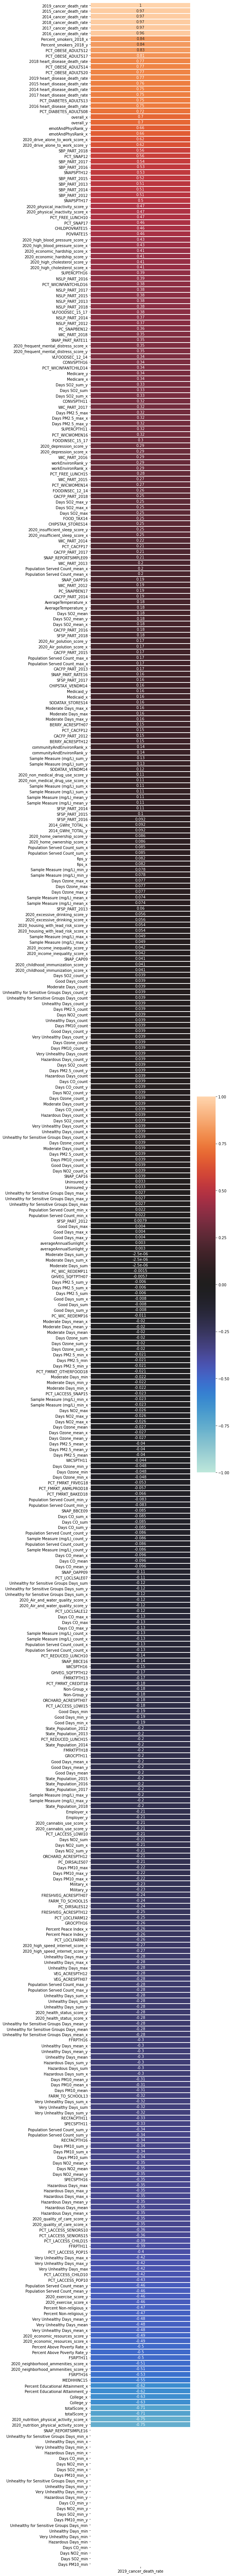

In [159]:
#check correlations cancer 2019 death rate
cancer_corr = df.corr()
## heatmap of "Apps" specifically with other features
plt.figure(figsize = (6, 126))
sns.heatmap(cancer_corr[['2019_cancer_death_rate']].sort_values(by = "2019_cancer_death_rate", ascending = False), cmap = 'icefire',
            annot = True, vmin = -1, vmax = 1, linewidth = 0.1);

In [98]:
#the variables at the bottom are all ones or zeros, see example below
df['SNAP_REPORTSIMPLE16'].describe() #why does it not have a corr value?

count    50.0
mean     1.0 
std      0.0 
min      1.0 
25%      1.0 
50%      1.0 
75%      1.0 
max      1.0 
Name: SNAP_REPORTSIMPLE16, dtype: float64

In [160]:
#plots for features with absolule value corr > 0.5
col_names = list(cancer_corr.loc[(cancer_corr['2019_cancer_death_rate'] <= -0.5)].index )
col_names.extend(list(cancer_corr.loc[(cancer_corr['2019_cancer_death_rate'] >= 0.5)].index))
#col_names = [item for item in features if 'CANCER' not in item]
col_names

['FSRPTH11',
 'FSRPTH16',
 'MEDHHINC15',
 'totalScore_x',
 'College_x',
 'Percent Educational Attainment_x',
 'Percent Above Poverty Rate_x',
 '2020_neighborhood_ammenities_score_x',
 '2020_nutrition_physical_activity_score_x',
 'totalScore_y',
 'College_y',
 'Percent Educational Attainment_y',
 'Percent Above Poverty Rate_y',
 '2020_neighborhood_ammenities_score_y',
 '2020_nutrition_physical_activity_score_y',
 'SBP_PART_2012',
 'SBP_PART_2013',
 'SBP_PART_2014',
 'SBP_PART_2015',
 'SBP_PART_2016',
 'SBP_PART_2017',
 'SBP_PART_2018',
 'SNAPSPTH12',
 'SNAPSPTH17',
 'PCT_DIABETES_ADULTS08',
 'PCT_DIABETES_ADULTS13',
 'PCT_OBESE_ADULTS12',
 'PCT_OBESE_ADULTS17',
 'PCT_SNAP12',
 'PCT_OBESE_ADULTS20',
 'PCT_OBESE_ADULTS14',
 '2019_cancer_death_rate',
 '2018_cancer_death_rate',
 '2017_cancer_death_rate',
 '2016_cancer_death_rate',
 '2015_cancer_death_rate',
 '2014_cancer_death_rate',
 '2019 heart_disease_death_rate',
 '2018 heart_disease_death_rate',
 '2017 heart_disease_death_rate',
 '2016

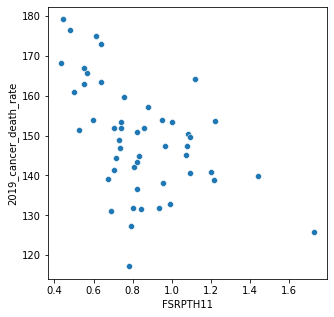

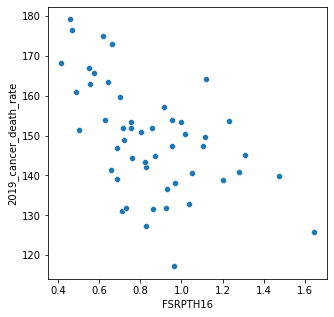

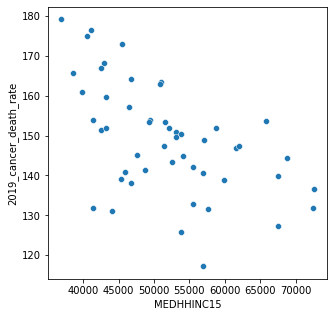

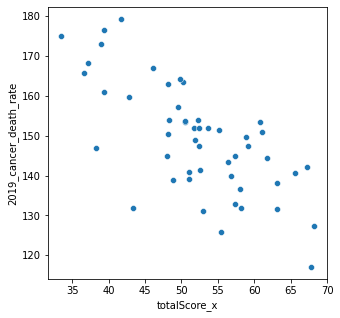

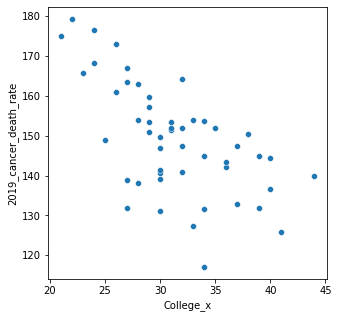

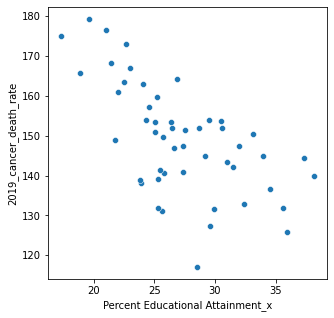

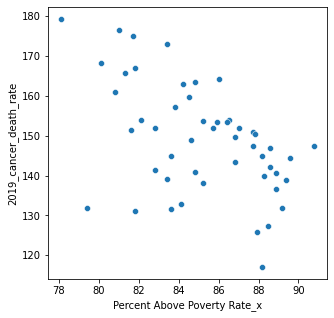

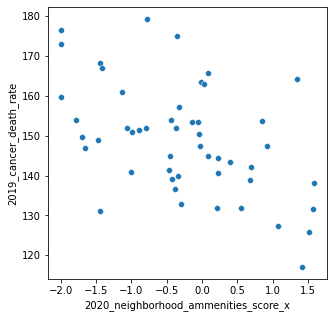

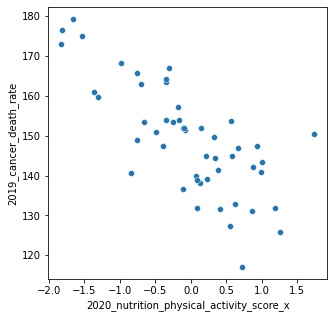

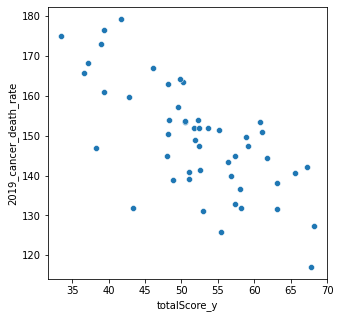

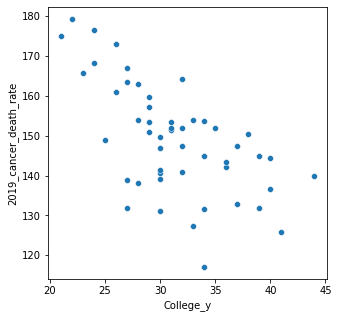

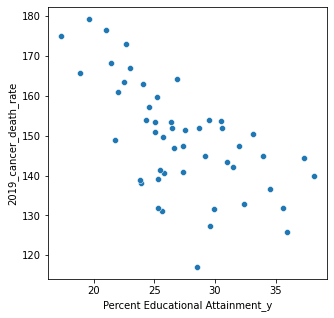

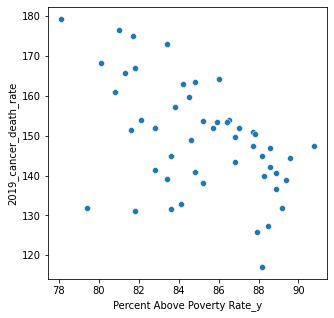

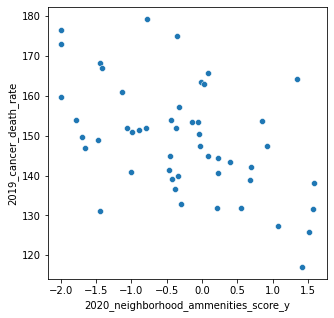

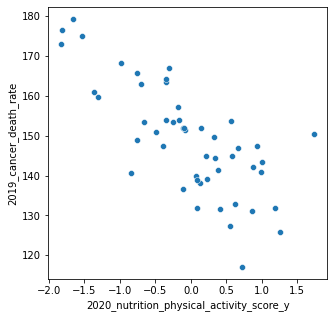

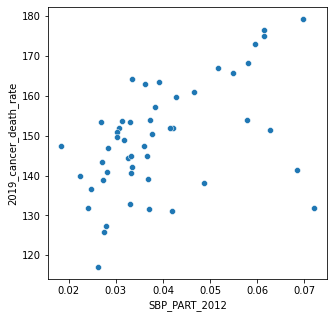

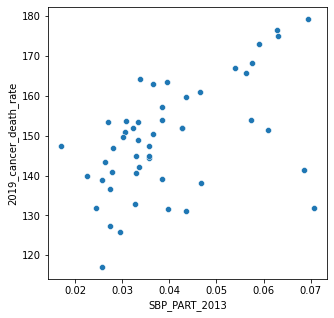

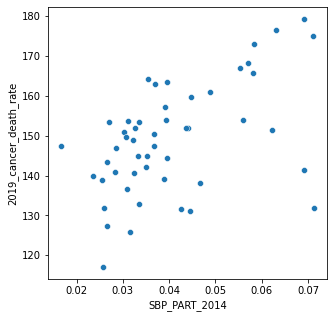

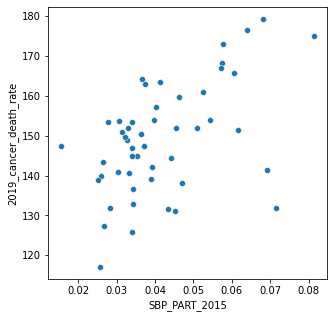

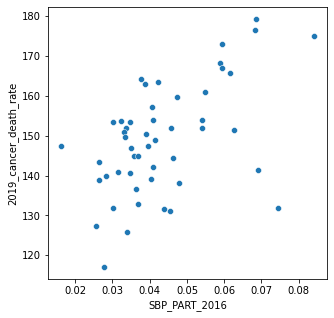

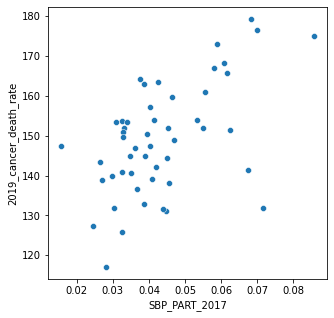

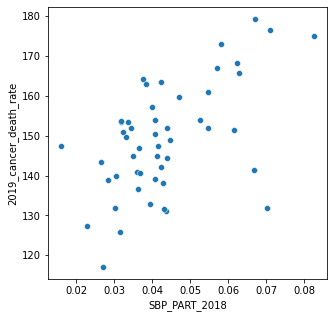

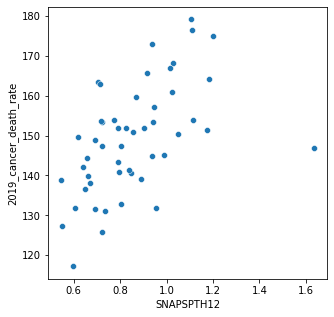

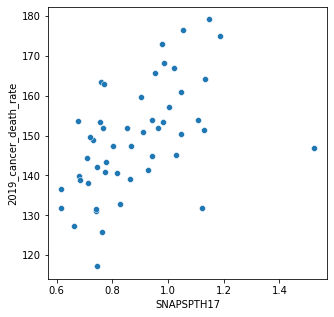

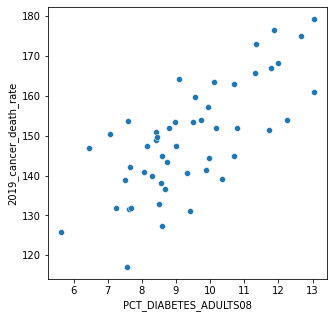

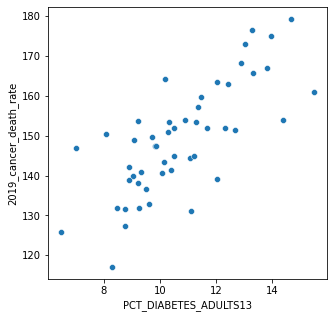

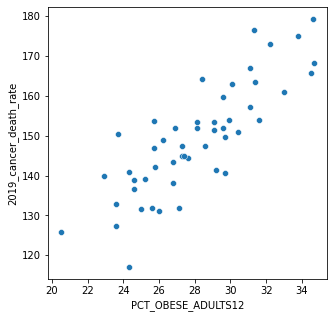

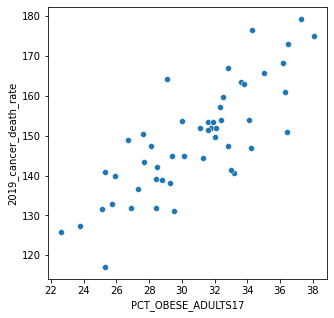

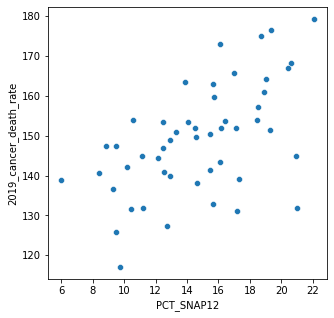

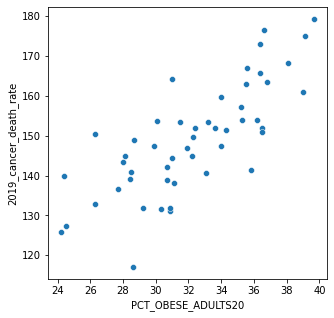

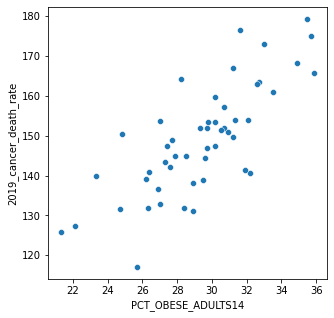

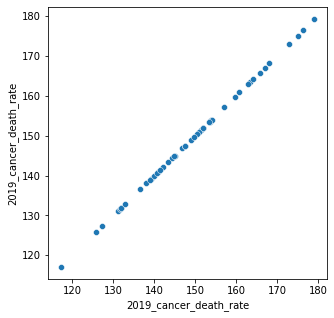

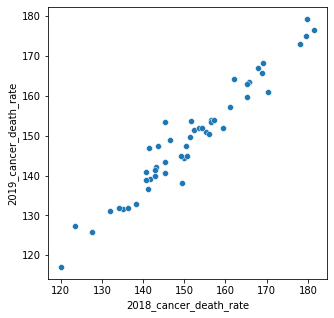

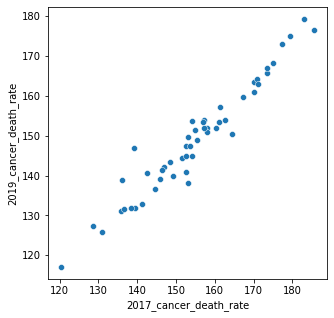

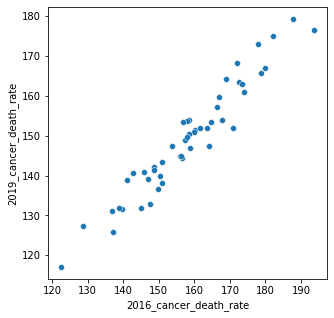

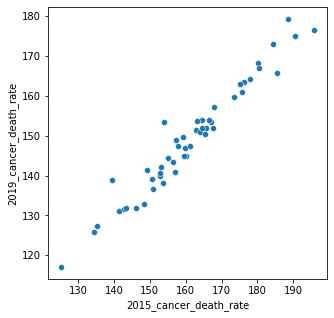

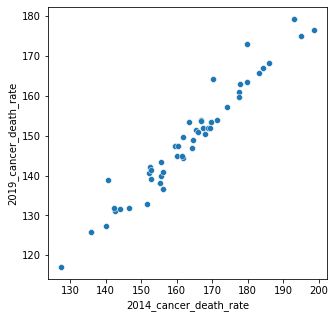

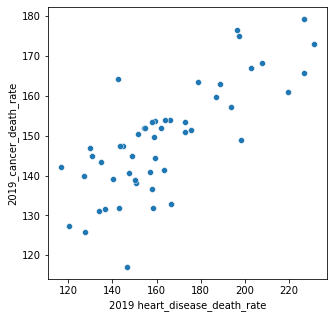

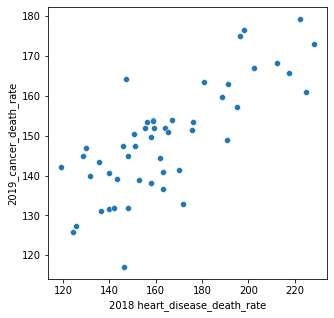

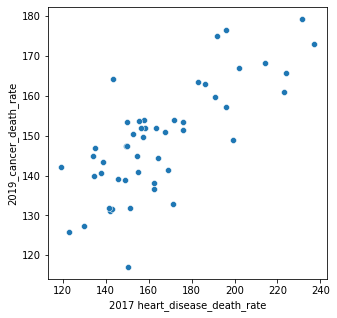

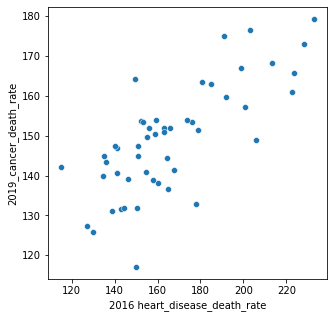

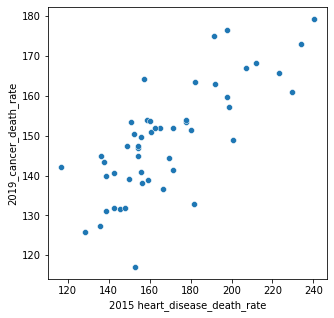

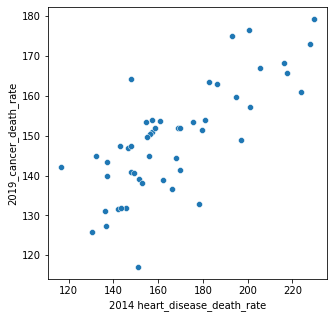

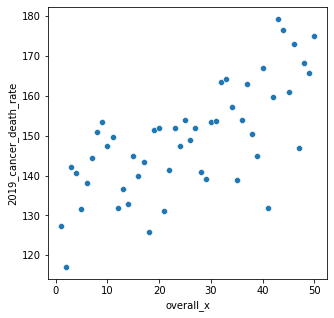

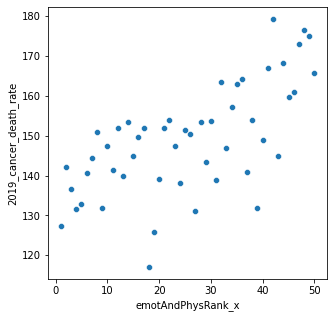

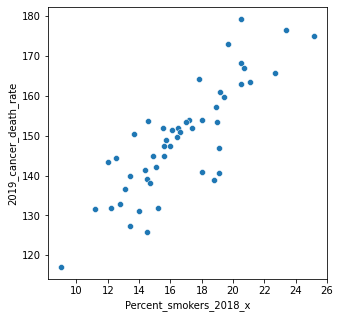

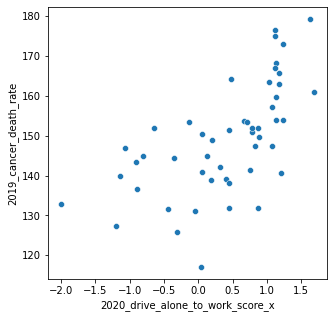

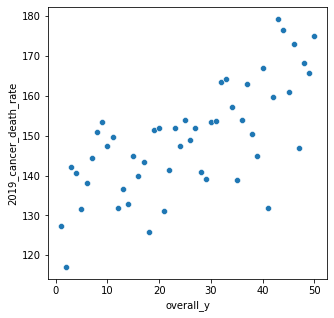

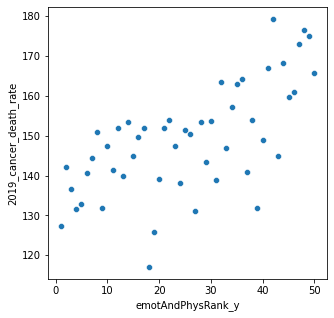

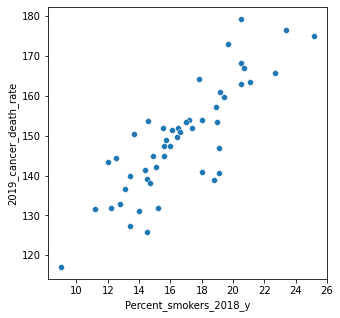

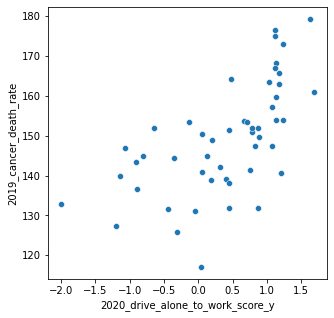

In [161]:
#plot scatter charts for cancer death rate
def scat(x):
    plt.figure(figsize=(5,5))
    sns.scatterplot(data = df, x= x, y= '2019_cancer_death_rate')
    return plt.show()
for i in col_names:
    scat(i)

<ipython-input-162-e6314e193d49>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



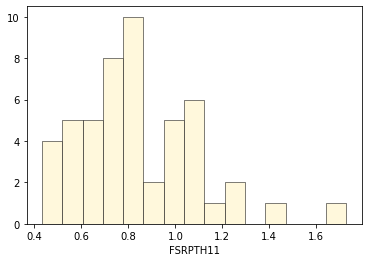

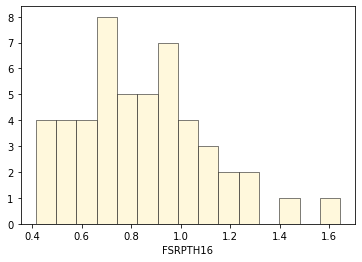

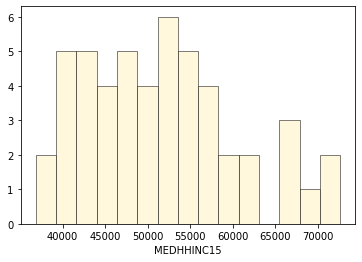

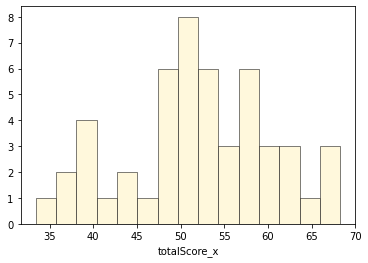

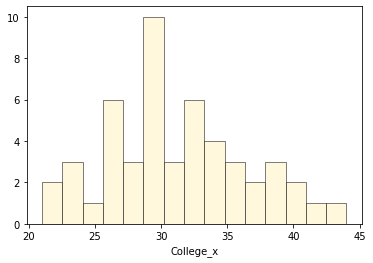

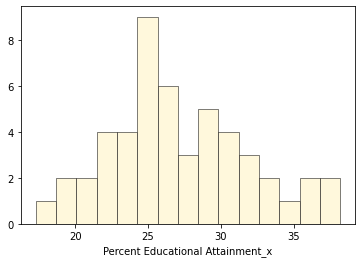

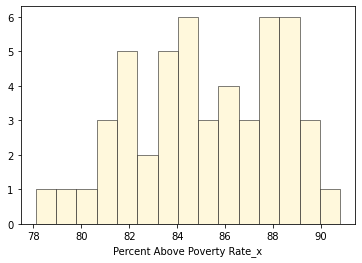

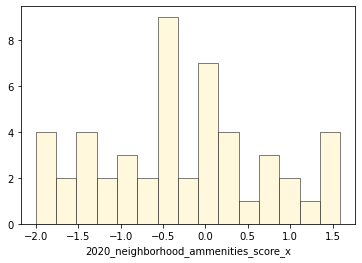

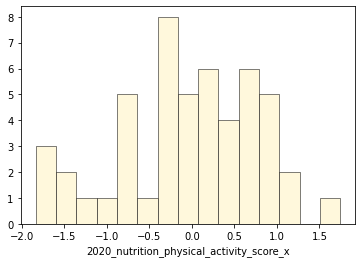

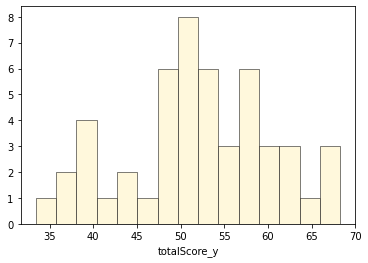

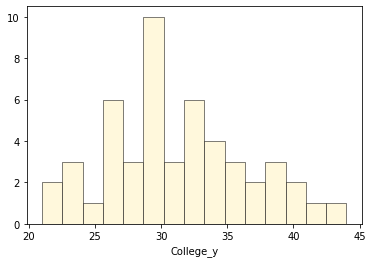

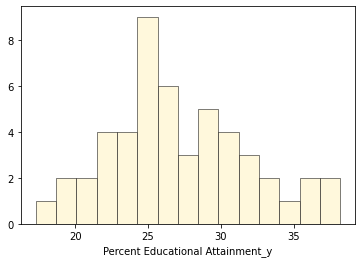

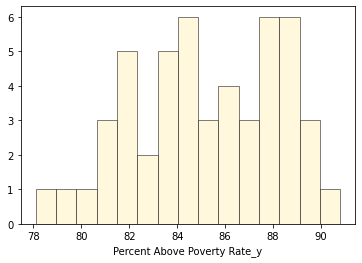

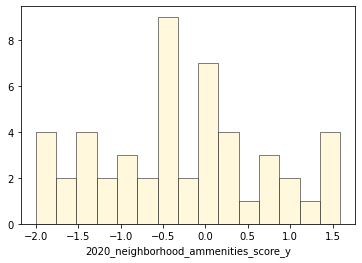

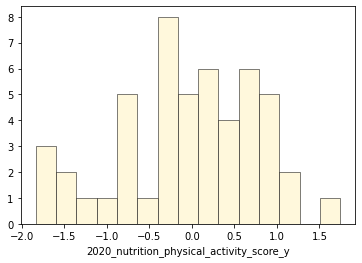

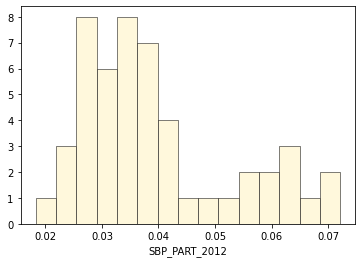

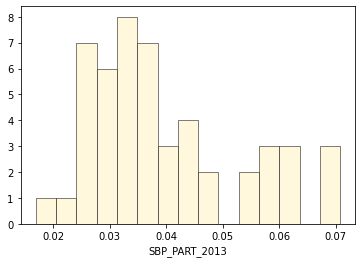

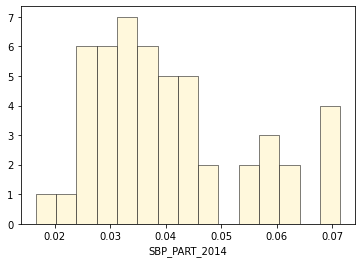

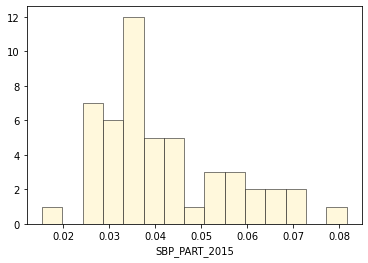

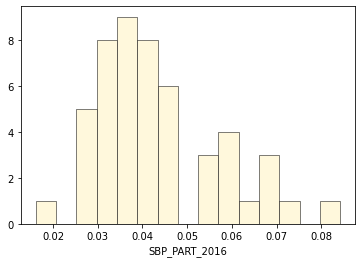

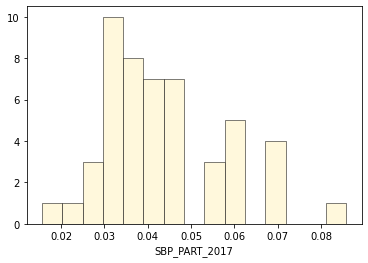

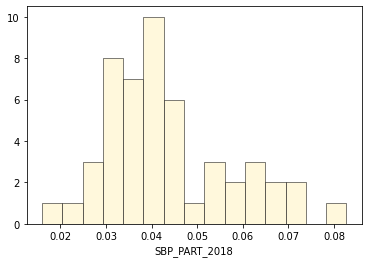

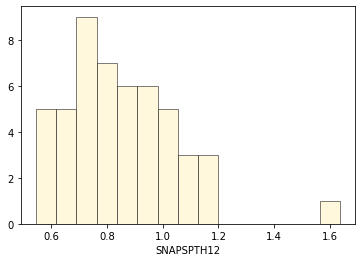

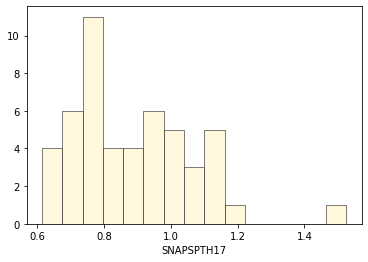

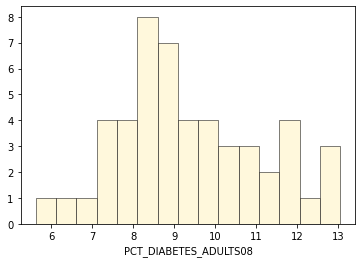

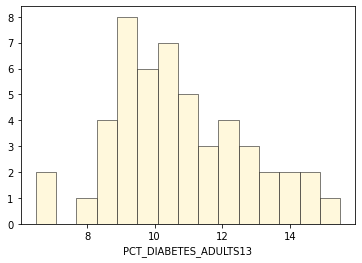

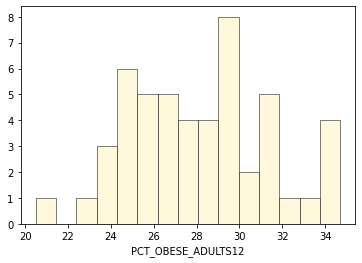

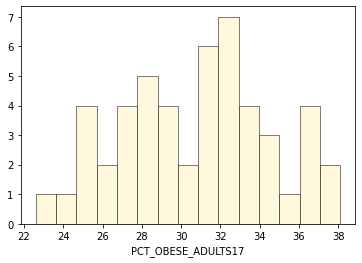

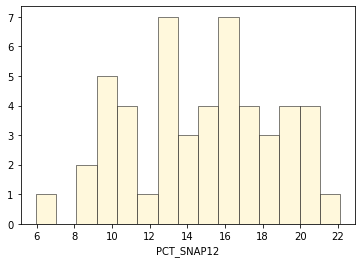

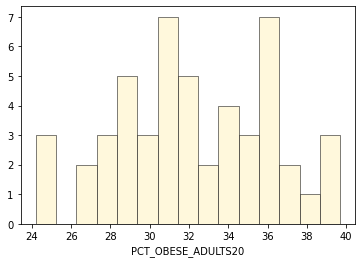

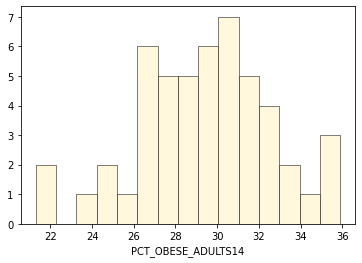

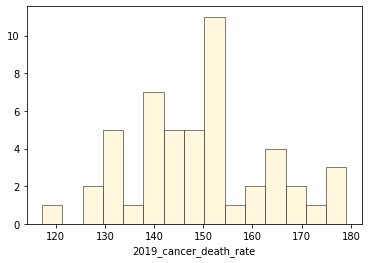

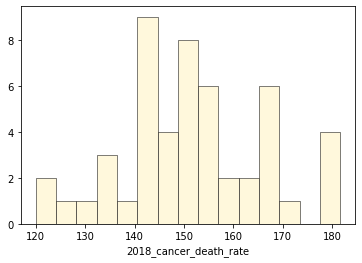

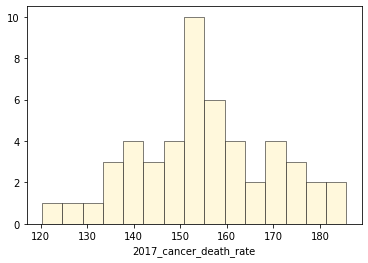

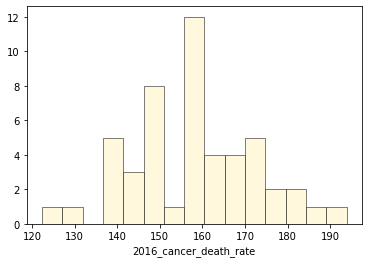

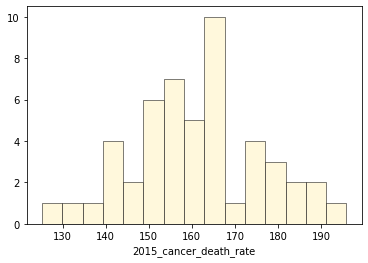

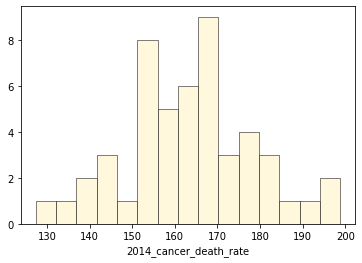

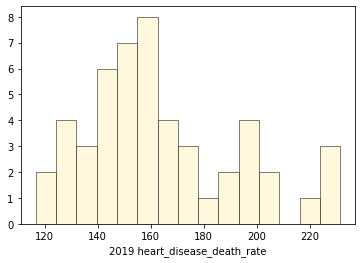

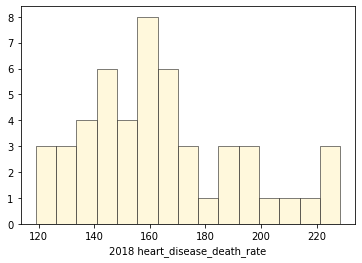

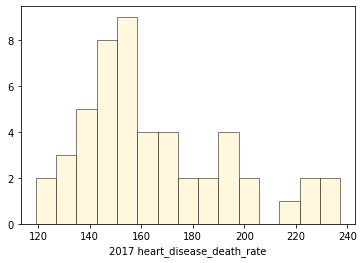

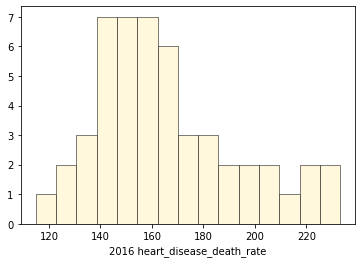

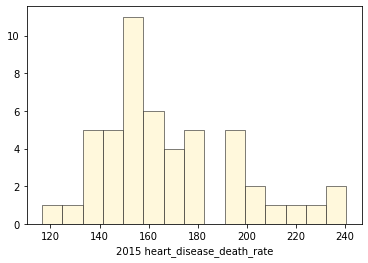

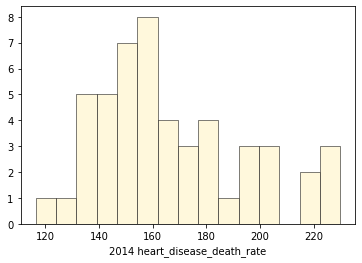

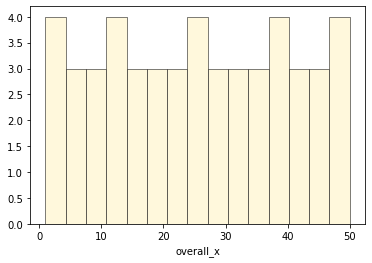

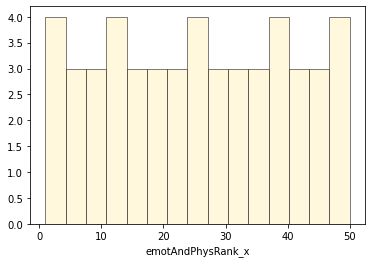

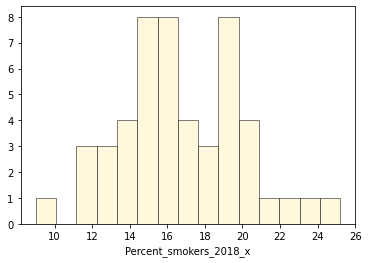

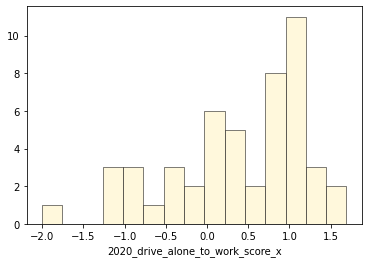

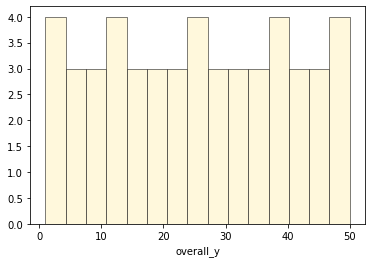

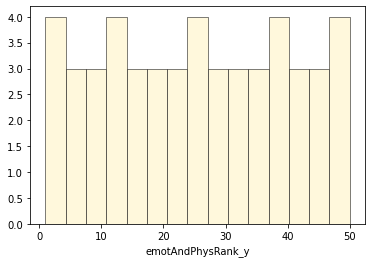

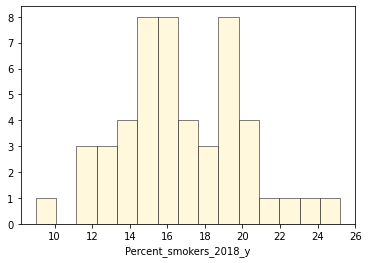

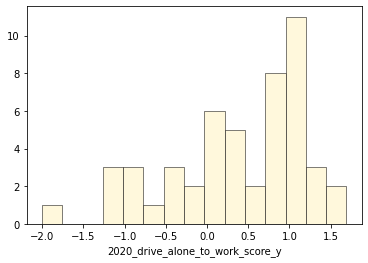

In [162]:
#histograms for cancer death rate for variables with absolute value correlation >= 0.5
for item in col_names:
    plt.figure()
    plt.hist(df[item], bins=15, edgecolor='black', linewidth=0.5, color='cornsilk')
    plt.xlabel(item)

<ipython-input-163-fc5988605916>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



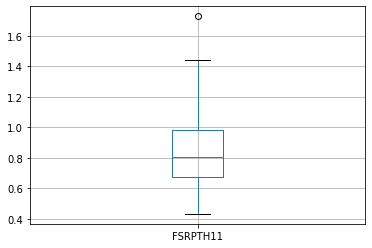

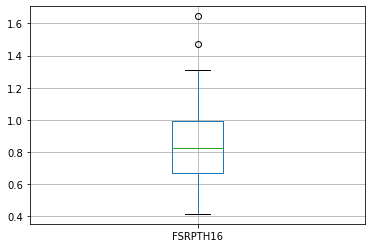

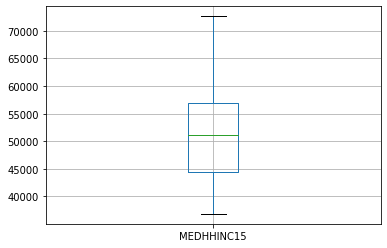

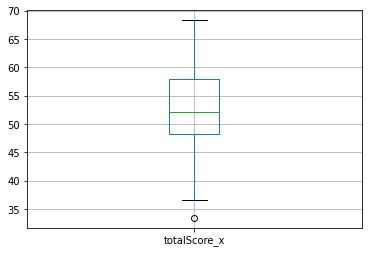

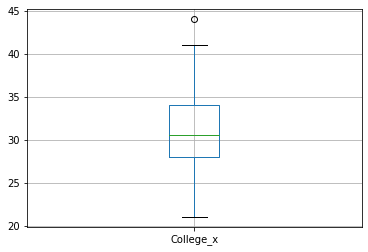

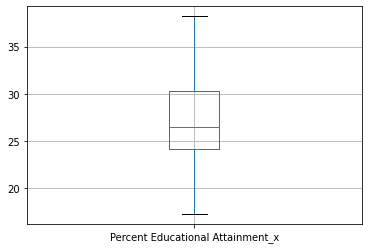

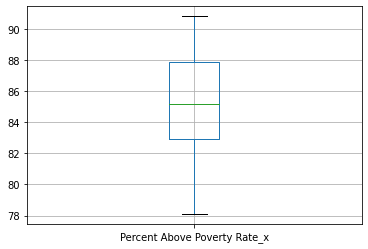

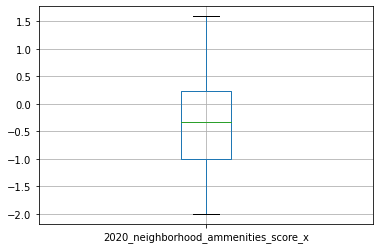

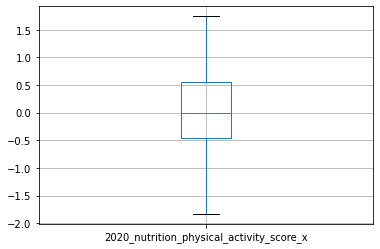

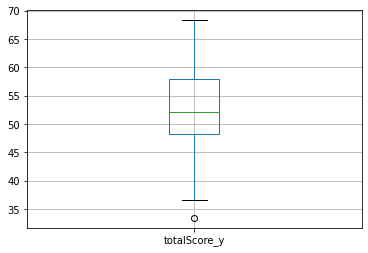

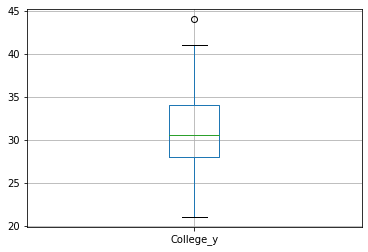

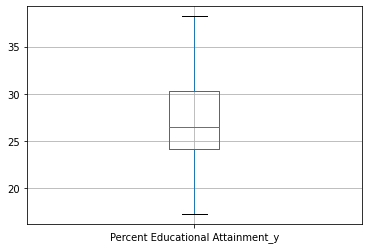

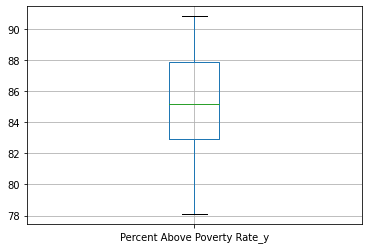

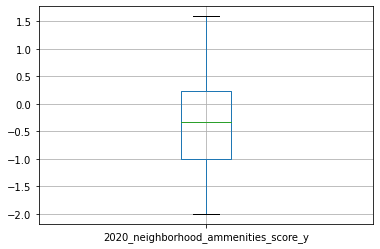

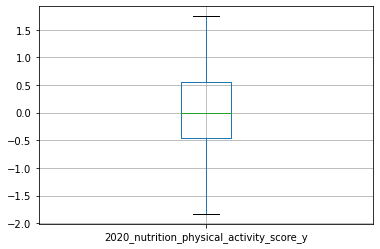

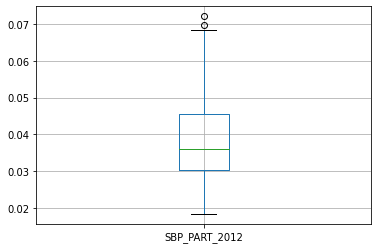

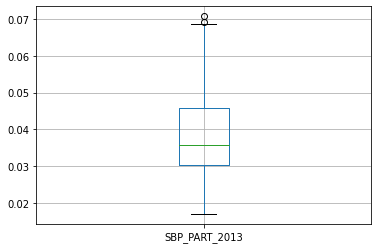

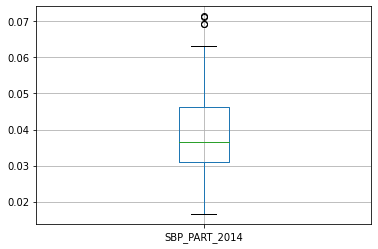

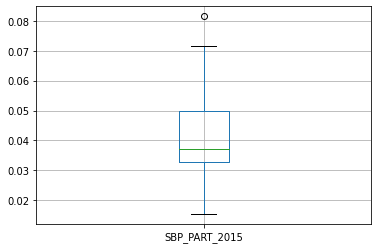

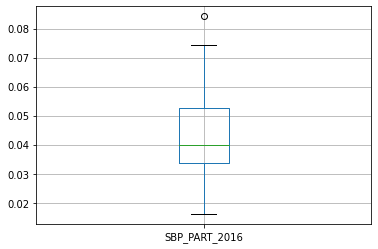

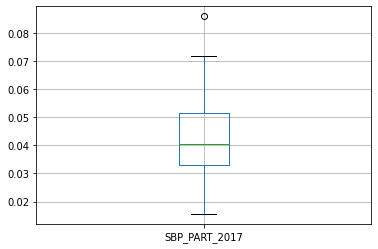

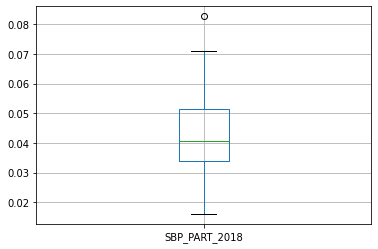

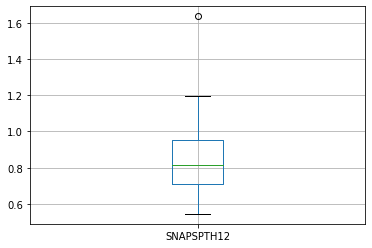

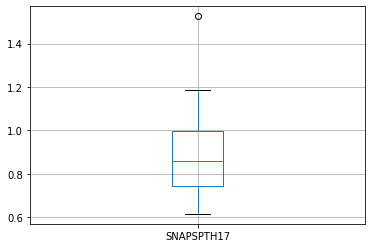

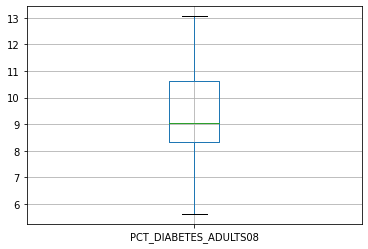

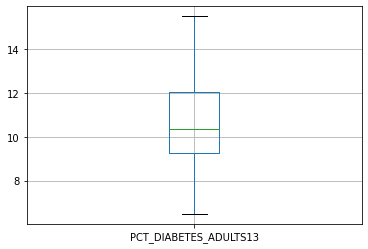

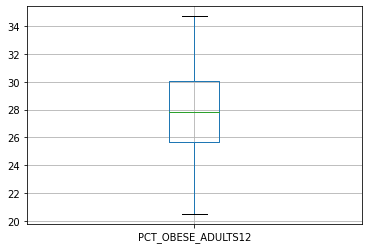

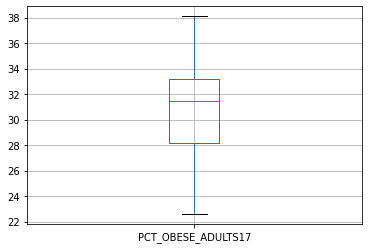

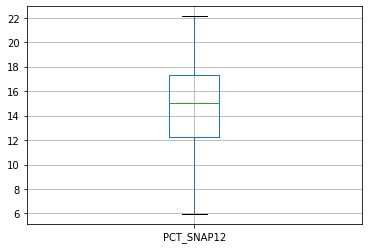

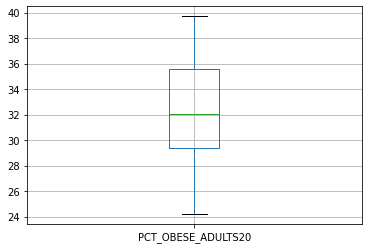

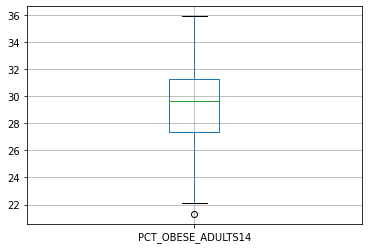

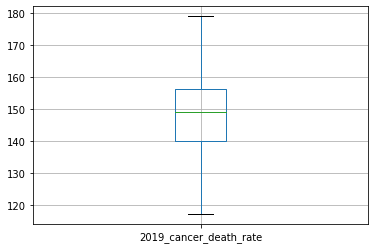

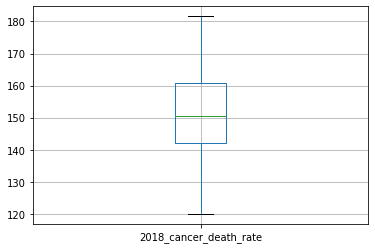

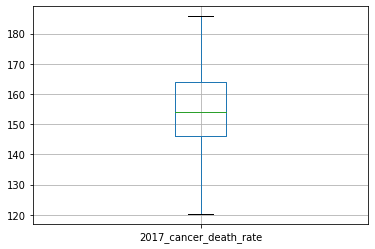

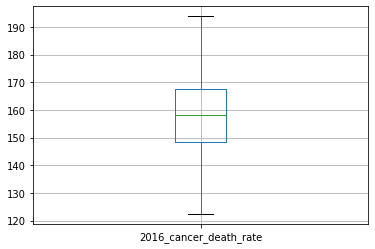

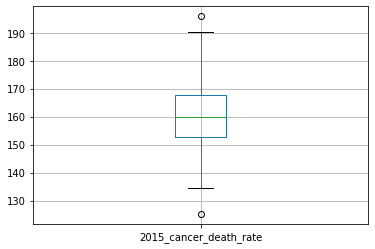

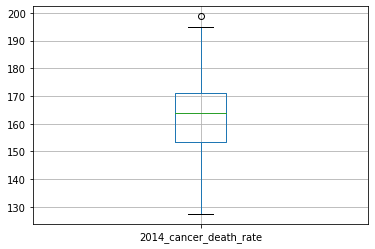

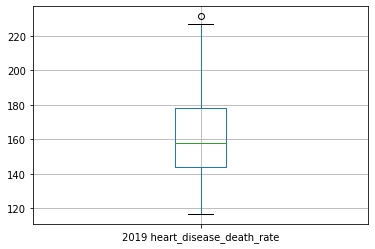

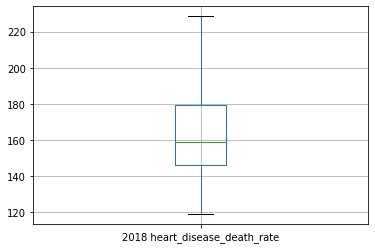

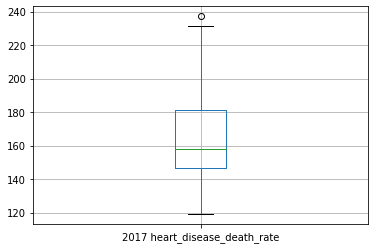

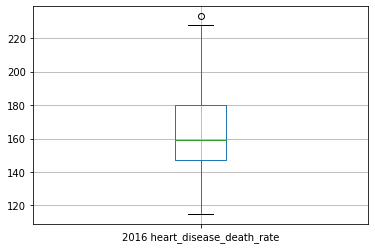

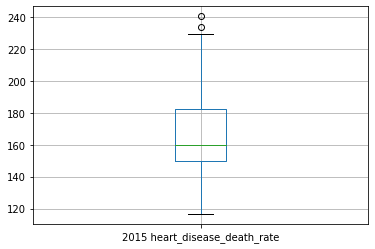

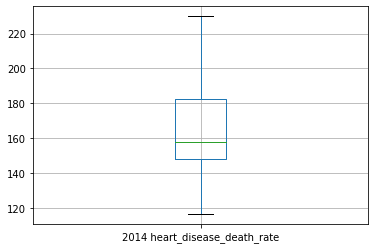

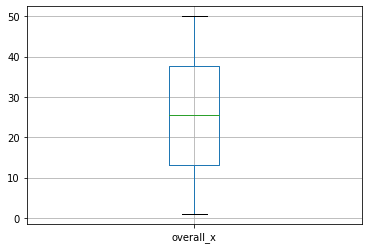

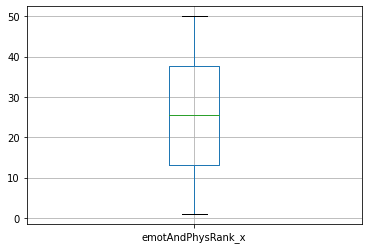

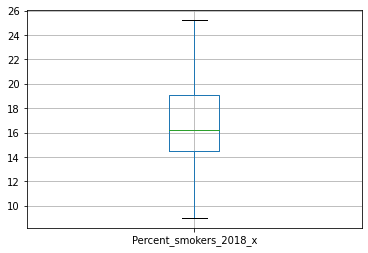

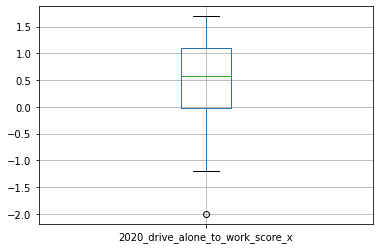

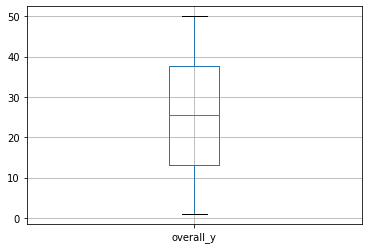

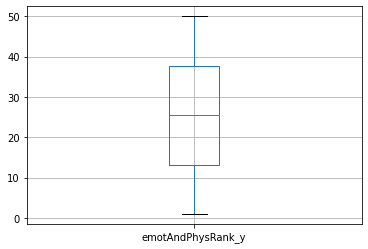

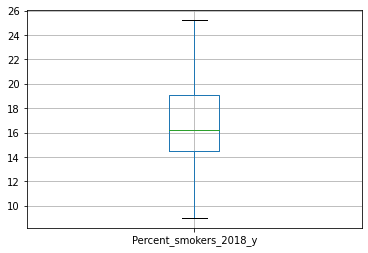

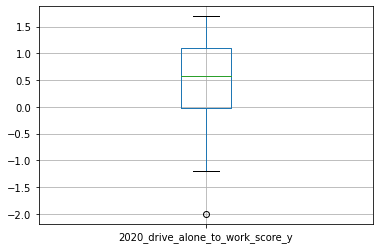

In [163]:
#boxplots for cancer death rate for variables with absolute value correlation >= 0.5
for item in col_names:
    plt.figure()
    df.boxplot(item)
    
#using percent change for time data, resolved most outliers

In [103]:
df.head()

Unnamed: 0       State  WIC_PART_2012  WIC_PART_2013  WIC_PART_2014  \
0  0           Alabama     0.029467       0.028776       0.027062        
1  1           Alaska      0.034186       0.031280       0.026626        
2  2           Arizona     0.029469       0.027506       0.025694        
3  3           Arkansas    0.031941       0.030335       0.028065        
4  4           California  0.038789       0.037405       0.034924        

   WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  WIC_PART_2018  NSLP_PART_2012  \
0  0.027226       0.026550       0.025434       0.024674       0.116904         
1  0.026686       0.025787       0.024586       0.023178       0.073822         
2  0.024449       0.023612       0.021778       0.020848       0.101034         
3  0.028277       0.026938       0.025481       0.024423       0.118190         
4  0.032475       0.029964       0.027418       0.025520       0.088394         

   NSLP_PART_2013  NSLP_PART_2014  NSLP_PART_2015  NSLP_PART_2016  \
0  0.111721        0.109675        0.109476        0.108111         
1  0.071224        0.069268        0.072696        0.070775         
2  0.097478        0.095662        0.094742        0.092297         
3  0.112347        0.110343        0.107749        0.106019         
4  0.086063        0.084938        0.083992        0.082939         

   NSLP_PART_2017  NSLP_PART_2018  SBP_PART_2012  SBP_PART_2013  \
0  0.104950        0.102219        0.046618       0.046408        
1  0.072424        0.072757        0.028421       0.028140        
2  0.090530        0.087527        0.041881       0.043635        
3  0.104629        0.103205        0.054882       0.056217        
4  0.081620        0.080320        0.037055       0.039637        

   SBP_PART_2014  SBP_PART_2015  SBP_PART_2016  SBP_PART_2017  SBP_PART_2018  \
0  0.048855       0.052393       0.054875       0.055655       0.054701        
1  0.028581       0.034047       0.035036       0.036185       0.036614        
2  0.044604       0.045180       0.045496       0.044649       0.043760        
3  0.058161       0.060476       0.061432       0.061555       0.062964        
4  0.042612       0.043415       0.043942       0.043835       0.043144        

   CACFP_PART_2012  CACFP_PART_2013  CACFP_PART_2014  CACFP_PART_2015  \
0  0.008909         0.008666         0.009301         0.010563          
1  0.014431         0.014874         0.015523         0.014625          
2  0.006356         0.006473         0.005991         0.006227          
3  0.018897         0.022851         0.025892         0.022826          
4  0.009561         0.011792         0.013252         0.014445          

   CACFP_PART_2016  CACFP_PART_2017  CACFP_PART_2018  SFSP_PART_2012  \
0  0.012220         0.012587         0.013429         0.005415         
1  0.013539         0.013629         0.012946         0.006381         
2  0.006136         0.005999         0.006927         0.004202         
3  0.022373         0.021129         0.018927         0.008881         
4  0.015177         0.015683         0.015790         0.002750         

   SFSP_PART_2013  SFSP_PART_2014  SFSP_PART_2015  SFSP_PART_2016  \
0  0.006274        0.008773        0.010244        0.010009         
1  0.006890        0.009059        0.007932        0.006322         
2  0.003570        0.003447        0.002160        0.002005         
3  0.014173        0.015445        0.010435        0.011961         
4  0.002996        0.003001        0.003287        0.003149         

   SFSP_PART_2017  SFSP_PART_2018  State_Population_2012  \
0  0.010589        0.010479        4815564                 
1  0.006703        0.005785        730399                  
2  0.001745        0.002050        6556629                 
3  0.007840        0.006042        2952109                 
4  0.003864        0.003660        37960782                

   State_Population_2013  State_Population_2014  State_Population_2015  \
0  4830460                4842481                4

In [104]:
col_names

['FSRPTH11',
 'FSRPTH16',
 'MEDHHINC15',
 'totalScore',
 'College',
 'Percent Educational Attainment',
 'Percent Above Poverty Rate',
 '2020_neighborhood_ammenities_score',
 '2020_nutrition_physical_activity_score',
 'SBP_PART_2012',
 'SBP_PART_2013',
 'SBP_PART_2014',
 'SBP_PART_2015',
 'SBP_PART_2016',
 'SBP_PART_2017',
 'SBP_PART_2018',
 'SNAPSPTH12',
 'SNAPSPTH17',
 'PCT_DIABETES_ADULTS08',
 'PCT_DIABETES_ADULTS13',
 'PCT_OBESE_ADULTS12',
 'PCT_OBESE_ADULTS17',
 'PCT_SNAP12',
 'PCT_OBESE_ADULTS20',
 'PCT_OBESE_ADULTS14',
 '2019_cancer_death_rate',
 '2018_cancer_death_rate',
 '2017_cancer_death_rate',
 '2016_cancer_death_rate',
 '2015_cancer_death_rate',
 '2014_cancer_death_rate',
 '2019 heart_disease_death_rate',
 '2018 heart_disease_death_rate',
 '2017 heart_disease_death_rate',
 '2016 heart_disease_death_rate',
 '2015 heart_disease_death_rate',
 '2014 heart_disease_death_rate',
 'overall',
 'emotAndPhysRank',
 'Percent_smokers_2018',
 '2020_drive_alone_to_work_score']

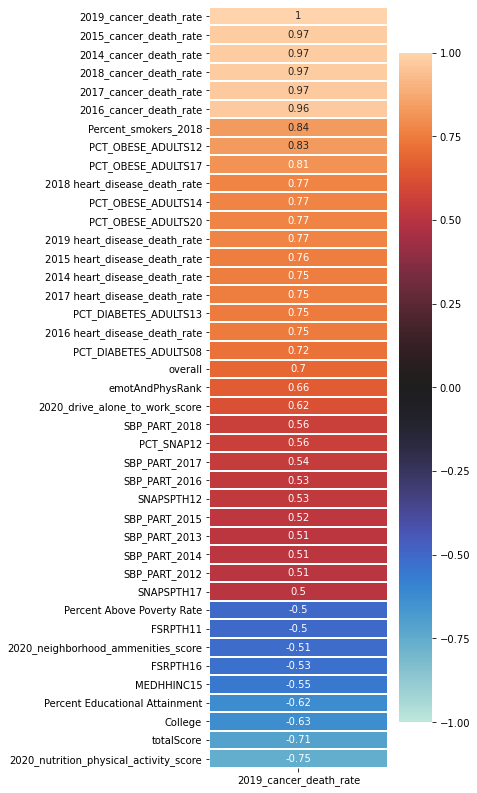

In [105]:
## Corr figure for highest cancer corr values
plt.figure(figsize = (4, 14))
corr = df[col_names].corr()
sns.heatmap(corr[['2019_cancer_death_rate']].sort_values(by = '2019_cancer_death_rate', ascending = False), cmap = 'icefire',
            annot = True, vmin = -1, vmax = 1, linewidth = 0.1);
plt.savefig('images/cancer_corr.jpg', bbox_inches='tight')

In [106]:
# code from https://plotly.com/python/choropleth-maps/
#air quality rate by state

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abrv'], # Spatial coordinates
    z = df['2020_nutrition_physical_activity_score'],
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Nutrition and Physical Activity",
    marker_line_color='black'
))

fig.update_layout(
    title_text = '2020 Nutrition and Physical Activity Score',
    geo_scope='usa', # limit map scope to USA
)

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#pyo.plot(fig) #this give html figure
fig.write_image("images/nutrition_activity.jpeg")

In [107]:
# code from https://plotly.com/python/choropleth-maps/
#poverty rate by state

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abrv'], # Spatial coordinates
    z = df['totalScore'],
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Poverty",
    marker_line_color='black'
))

fig.update_layout(
    title_text = 'Total Happiness Score',
    geo_scope='usa', # limit map scope to USA
)

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#pyo.plot(fig) #this give html figure
fig.write_image("images/totalscore.jpeg")

In [108]:
# code from https://plotly.com/python/choropleth-maps/
#plot smoking by state

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abrv'], # Spatial coordinates
    z = df['College'],
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Smoking",
    marker_line_color='black'
))

fig.update_layout(
    title_text = 'College by State',
    geo_scope='usa', # limit map scope to USA
)

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#pyo.plot(fig) #this give html figure
fig.write_image("images/college.jpeg")

In [110]:
#plots for features with absolule value corr > 0.7
col_names = list(cancer_corr.loc[(cancer_corr['2019_cancer_death_rate'] >= .7)].index )

col_names

['PCT_DIABETES_ADULTS08',
 'PCT_DIABETES_ADULTS13',
 'PCT_OBESE_ADULTS12',
 'PCT_OBESE_ADULTS17',
 'PCT_OBESE_ADULTS20',
 'PCT_OBESE_ADULTS14',
 '2019_cancer_death_rate',
 '2018_cancer_death_rate',
 '2017_cancer_death_rate',
 '2016_cancer_death_rate',
 '2015_cancer_death_rate',
 '2014_cancer_death_rate',
 '2019 heart_disease_death_rate',
 '2018 heart_disease_death_rate',
 '2017 heart_disease_death_rate',
 '2016 heart_disease_death_rate',
 '2015 heart_disease_death_rate',
 '2014 heart_disease_death_rate',
 'Percent_smokers_2018']

In [112]:
# code from https://plotly.com/python/choropleth-maps/
#farm to school lunch program by state

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abrv'], # Spatial coordinates
    z = df['PCT_DIABETES_ADULTS13'],
    #z = lead_states_by_year.mean(axis=1), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Diabetes",
    marker_line_color='black'
))

fig.update_layout(
    title_text = '2013 Diabetes by State',
    geo_scope='usa', # limit map scope to USA
)

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#pyo.plot(fig) #this give html figure
fig.write_image("images/diabetes.jpeg")

In [113]:
# code from https://plotly.com/python/choropleth-maps/
#college by state

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abrv'], # Spatial coordinates
    z = df['PCT_OBESE_ADULTS20'],
    #z = lead_states_by_year.mean(axis=1), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Obesity",
#     hovertext=lead_states_by_year['2006_Lead Sample Measure (mg/L)'],
    marker_line_color='black'
))

fig.update_layout(
    title_text = 'Obesity by State',
    geo_scope='usa', # limit map scope to USA
)

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#pyo.plot(fig) #this give html figure
fig.write_image("images/obesity.jpeg")

In [115]:
# code from https://plotly.com/python/choropleth-maps/
#emotional and physical score by state

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abrv'], # Spatial coordinates
    z = df['emotAndPhysRank'],
    #z = lead_states_by_year.mean(axis=1), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Emotional and Physical",
#     hovertext=lead_states_by_year['2006_Lead Sample Measure (mg/L)'],
    marker_line_color='black'
))

fig.update_layout(
    title_text = 'Emotional and Physical Rank by State',
    geo_scope='usa', # limit map scope to USA
)

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#pyo.plot(fig) #this give html figure
fig.write_image("images/emot_phys.jpeg")

In [117]:
# code from https://plotly.com/python/choropleth-maps/
#heart disease by state

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abrv'], # Spatial coordinates
    z = df['2019 heart_disease_death_rate'],
    #z = lead_states_by_year.mean(axis=1), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Heart Disease Death Rate",
#     hovertext=lead_states_by_year['2006_Lead Sample Measure (mg/L)'],
    marker_line_color='black'
))

fig.update_layout(
    title_text = 'Heart Disease Death Rate by State',
    geo_scope='usa', # limit map scope to USA
)

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#pyo.plot(fig) #this give html figure
fig.write_image("images/hd.jpeg")

In [119]:
# code from https://plotly.com/python/choropleth-maps/
#cancer by state

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abrv'], # Spatial coordinates
    z = df['2019_cancer_death_rate'],
    #z = lead_states_by_year.mean(axis=1), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Cancer Death Rate",
#     hovertext=lead_states_by_year['2006_Lead Sample Measure (mg/L)'],
    marker_line_color='black'
))

fig.update_layout(
    title_text = 'Cancer Death Rate by State',
    geo_scope='usa', # limit map scope to USA
)

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#pyo.plot(fig) #this give html figure
fig.write_image("images/cancer.jpeg")

In [120]:
# code from https://plotly.com/python/choropleth-maps/
#happiness score by state

fig = go.Figure(data=go.Choropleth(
    locations=df['state_abrv'], # Spatial coordinates
    z = df['overall'],
    #z = lead_states_by_year.mean(axis=1), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Overall Happiness",
#     hovertext=lead_states_by_year['2006_Lead Sample Measure (mg/L)'],
    marker_line_color='black'
))

fig.update_layout(
    title_text = 'Overall Happiness by State',
    geo_scope='usa', # limit map scope to USA
)

#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#pyo.plot(fig) #this give html figure
fig.write_image("images/happy.jpeg")

In [ ]:
#merge health data with project 5 data
df = pd.merge(df, health, on = 'State', how = 'inner')
df.head()

In [122]:
cancer_preds.sort_values(by = 'abs_error', ascending = False)

Unnamed: 0           State  2019_cancer_death_rate       preds state_abrv  \
30  30          New Mexico      131.9                   146.296885  NJ          
2   2           Arizona         131.1                   144.931090  AR          
43  43          Utah            117.2                   128.907846  UT          
22  22          Minnesota       142.2                   133.104540  MN          
44  44          Vermont         150.4                   141.388117  VA          
18  18          Maine           164.2                   156.545819  MA          
0   0           Alabama         160.8                   168.063808  AK          
11  11          Idaho           138.1                   144.994399  IA          
40  40          South Dakota    153.4                   146.852266  SD          
38  38          Rhode Island    153.6                   147.084546  RI          
6   6           Connecticut     131.9                   138.372158  CT          
8   8           Florida         139.1                   145.540797  FL          
42  42          Texas           141.4                   147.811968  TX          
12  12          Illinois        151.9                   145.527254  ID          
41  41          Tennessee       167.0                   160.757638  TN          
13  13          Indiana         163.4                   157.843592  IL          
24  24          Missouri        159.7                   154.226686  MS          
34  34          Ohio            163.0                   157.743872  OH          
23  23          Mississippi     179.1                   174.178043  MO          
10  10          Hawaii          127.3                   131.173602  HI          
29  29          New Jersey      136.5                   140.256298  NH          
33  33          North Dakota    140.7                   144.355698  NY          
31  31          New York        132.9                   136.276184  NM          
49  49          Wyoming         138.9                   142.255072  WY          
20  20          Massachusetts   139.9                   136.711642  ME          
48  48          Wisconsin       149.6                   146.413297  WV          
37  37          Pennsylvania    153.5                   150.350985  PA          
39  39          South Carolina  154.0                   156.884037  SC          
45  45          Virginia        144.9                   147.781983  VT          
16  16          Kentucky        176.4                   173.680217  KY          
46  46          Washington      143.4                   140.715122  WA          
35  35          Oklahoma        173.0                   170.998270  OK          
27  27          Nevada          149.0                   147.068603  ND          
7   7           Delaware        151.9                   150.066349  DE          
3   3           Arkansas        165.7                   167.134379  AZ          
25  25          Montana         140.9                   142.290217  MT          
21  21          Michigan        157.1                   155.736630  MI          
32  32          North Carolina  152.0                   150.867240  NV          
15  15          Kansas          153.8                   152.703505  KS          
19  19          Maryland        144.4                   145.443027  MD          
5   5           Colorado        125.9                   125.010780  CO          
14  14          Iowa            150.9                   150.160591  IN          
28  28          New Hampshire   147.4                   146.700548  NE          
9   9           Georgia         151.4                   152.068501  GA          
47  47          West Virginia   175.0                   175.553138  WI          
36  36          Oregon          145.0                   145.422116  OR          
26  26          Nebraska        147.4                   147.771132  NC          
1   1           Alaska          146.9                   146.649164  AL          
17  17          Louisiana       168

In [62]:
cancer_preds['abs error'] = abs(cancer_preds['Error'])
cancer_preds.sort_values(by = 'abs error', ascending = False)

Unnamed: 0           State  2019_cancer_death_rate       preds      Error  \
30  30          New Mexico      131.9                   146.296885 -14.396884   
2   2           Arizona         131.1                   144.931090 -13.831090   
43  43          Utah            117.2                   128.907846 -11.707846   
22  22          Minnesota       142.2                   133.104540  9.095460    
44  44          Vermont         150.4                   141.388117  9.011883    
18  18          Maine           164.2                   156.545819  7.654181    
0   0           Alabama         160.8                   168.063808 -7.263808    
11  11          Idaho           138.1                   144.994399 -6.894399    
40  40          South Dakota    153.4                   146.852266  6.547734    
38  38          Rhode Island    153.6                   147.084546  6.515454    
6   6           Connecticut     131.9                   138.372158 -6.472158    
8   8           Florida         139.1                   145.540797 -6.440797    
42  42          Texas           141.4                   147.811968 -6.411968    
12  12          Illinois        151.9                   145.527254  6.372746    
41  41          Tennessee       167.0                   160.757638  6.242362    
13  13          Indiana         163.4                   157.843592  5.556408    
24  24          Missouri        159.7                   154.226686  5.473314    
34  34          Ohio            163.0                   157.743872  5.256128    
23  23          Mississippi     179.1                   174.178043  4.921957    
10  10          Hawaii          127.3                   131.173602 -3.873602    
29  29          New Jersey      136.5                   140.256298 -3.756298    
33  33          North Dakota    140.7                   144.355698 -3.655698    
31  31          New York        132.9                   136.276184 -3.376183    
49  49          Wyoming         138.9                   142.255072 -3.355072    
20  20          Massachusetts   139.9                   136.711642  3.188358    
48  48          Wisconsin       149.6                   146.413297  3.186703    
37  37          Pennsylvania    153.5                   150.350985  3.149015    
39  39          South Carolina  154.0                   156.884037 -2.884037    
45  45          Virginia        144.9                   147.781983 -2.881983    
16  16          Kentucky        176.4                   173.680217  2.719783    
46  46          Washington      143.4                   140.715122  2.684878    
35  35          Oklahoma        173.0                   170.998270  2.001730    
27  27          Nevada          149.0                   147.068603  1.931397    
7   7           Delaware        151.9                   150.066349  1.833651    
3   3           Arkansas        165.7                   167.134379 -1.434379    
25  25          Montana         140.9                   142.290217 -1.390217    
21  21          Michigan        157.1                   155.736630  1.363370    
32  32          North Carolina  152.0                   150.867240  1.132760    
15  15          Kansas          153.8                   152.703505  1.096495    
19  19          Maryland        144.4                   145.443027 -1.043027    
5   5           Colorado        125.9                   125.010780  0.889220    
14  14          Iowa            150.9                   150.160591  0.739409    
28  28          New Hampshire   147.4                   146.700548  0.699452    
9   9           Georgia         151.4                   152.068501 -0.668501    
47  47          West Virginia   175.0                   175.553138 -0.553138    
36  36          Oregon          145.0                   145.422116 -0.422116    
26  26          Nebraska        147.4                   147.771132 -0.371132    
1   1           Alaska          146.9                   146.649164  0.250836    
17  17          Louisiana       168

In [ ]:
#plot scatter charts for cancer death rate
def scat(x):
    plt.figure(figsize=(5,5))
    sns.scatterplot(data = df, x= x, y= '2019_cancer_death_rate')
    return plt.show()
for i in col_names:
    scat(i)

In [57]:
project5_data = df.to_csv('./data_2/project5_data.csv') #share data and save